
## **Прогнозные модели и модели кластеризации**
---

# Задача: Провести анализ одного из реальных источников данных, используя Python и соответствующие библиотеки для анализа данных.

In [ ]:
import pandas as pd
import numpy as np
import statistics
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import string
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

In [ ]:
pd.set_option('display.max_columns', None) #код, чтобы отобразить все столбцы таблицы

Загрузим файл с данными

Спортсмены Forbes
https://www.kaggle.com/datasets/parulpandey/forbes-highest-paid-athletes-19902019

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Forbes Richest Atheletes (Forbes Richest Athletes 1990-2020).csv to Forbes Richest Atheletes (Forbes Richest Athletes 1990-2020) (5).csv


In [ ]:
data = pd.read_csv("Forbes Richest Atheletes (Forbes Richest Athletes 1990-2020).csv", sep = ',')
data.head()

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0


### 1. Изучим данные и выполним предобработку

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S.NO                  301 non-null    int64  
 1   Name                  301 non-null    object 
 2   Nationality           301 non-null    object 
 3   Current Rank          301 non-null    int64  
 4   Previous Year Rank    277 non-null    object 
 5   Sport                 301 non-null    object 
 6   Year                  301 non-null    int64  
 7   earnings ($ million)  301 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 18.9+ KB


Файл содержит 8 колонок и 301 строку. Столбец с прошлогодним рейтингом имеет тип object. Поменяем на целочисленный, когда будем заполнять пропуски. Очевидно, в этом столбце они есть.

In [ ]:
data.columns = data.columns.str.replace(' ', '')  #удалим пробелы в названиях стобцов

Приведем названия столбцов к удобному виду

In [ ]:
data.rename(columns ={'CurrentRank':'current_rank', 'PreviousYearRank':'previous_year_rank', 'earnings($million)':'earnings_mln'},  inplace=True)
data.head()

,S.NO,Name,Nationality,current_rank,previous_year_rank,Sport,Year,earnings_mln
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0


Приведем все названия столбцов к нижнему регистру

In [ ]:
data.columns = data.columns.str.lower() #приведем все названия столбцов к нижнему регистру
data.head(1)

,s.no,name,nationality,current_rank,previous_year_rank,sport,year,earnings_mln
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6


Посмотрим внимательнее на столбец previous_year_rank с прошлогодним рейтингом.
Выведем список уникальных значений

In [ ]:
 data['previous_year_rank'].unique()

array([nan, '8', '1', '>30', '4', '5', '12', '6', '3', '9', '17', '13',
       '10', '>40', '19', '40', '7', '11', '30', '22', '20', 'not ranked',
       '38', '2', '15', '14', '26', 'none', '18', '>10', '>20', '?', '24',
       '21', '>14', '>100', '??'], dtype=object)

In [ ]:
data['previous_year_rank'].isna().sum()

24

Итак, 24 ячейки не заполнены, есть ячейки с данными, содержащими символы ?, >, none, not ranked. Т.к. в данных нет нулевого рейтинга, можно заменить отсутствующие значения на 0, чтобы иметь возможность лучше изучить данные. Но стоит иметь в виду, что 0 может их исказить, если применять к столбцу расчеты.

Заменим пустые  значения на 0

In [ ]:
data['previous_year_rank'].fillna(0, inplace=True)

Заменим символьные значения на 0, уберем лишние символы

In [ ]:
data['previous_year_rank'].replace({'?': '0', '??': '0', 'none': '0', 'not ranked': '0', '>100' : '100', '>10' : '10', '>14' : '14', '>40' : '40', '>20' : '20', '>30' : '30'},inplace =True)


In [ ]:
 data['previous_year_rank'].unique() #проверим

array([0, '8', '1', '30', '4', '5', '12', '6', '3', '9', '17', '13', '10',
       '40', '19', '7', '11', '22', '20', '0', '38', '2', '15', '14',
       '26', '18', '24', '21', '100'], dtype=object)

Зампеним тип данных на целочисленный

In [ ]:
data['previous_year_rank'] = data['previous_year_rank'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   s.no                301 non-null    int64  
 1   name                301 non-null    object 
 2   nationality         301 non-null    object 
 3   current_rank        301 non-null    int64  
 4   previous_year_rank  301 non-null    int64  
 5   sport               301 non-null    object 
 6   year                301 non-null    int64  
 7   earnings_mln        301 non-null    float64
dtypes: float64(1), int64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
data.describe()

,s.no,current_rank,previous_year_rank,year,earnings_mln
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,151.000000,5.448505,9.548173,2005.122924,45.516279
std,87.035433,2.850995,15.153718,9.063563,33.525337
min,1.000000,1.000000,0.000000,1990.000000,8.100000
25%,76.000000,3.000000,2.000000,1997.000000,24.000000
50%,151.000000,5.000000,6.000000,2005.000000,39.000000
75%,226.000000,8.000000,10.000000,2013.000000,59.400000
max,301.000000,10.000000,100.000000,2020.000000,300.000000


По данным видим, что ничего подозрительно нет. Данные предоставлены с 1990 по 2020 гг. Самая высокая прибыль 300 млн. долларов, самая низкая 8,1 млн. долларов.

Опираясь на таблицу выше, мы можем для всех столбцов узнать значения 1,2,3 квартилей . **Q1 это 25%, Q2 это 50%, что также является медианой, Q3 это 75%. Также здесь есть все значения среднего, минимум,  максимум и стандартное отклонение**

Т.к. на данном этапе мы работаем с генеральной совокупностью, а не с выборкой (мы пока не удалили ни одной строки), можно для вычисления **дисперсии** использовать функцию var библиотеки numpy без применения параметра ddof=1 и даже не использовать модуль statistics в данном случае

In [ ]:
print(data['earnings_mln'].var().round(3))

1123.948


Высокая дисперсия earnings_mln говорит нам о том, что значения в нашем наборе данных далеки от своего среднего. Таким образом, эти данные имеют высокий уровень изменчивости. Это видно и в таблице 45,5 млн. долл. против 300 млн. долл.

Посчитаем **квантили**

Чтобы посчитать квантили для столбца с прошлогодним рейтингом, придется поменять тип данных сейчас

In [ ]:
(
    data[['current_rank',	'earnings_mln']]
    .quantile([ .1, .9])
    .style.format("{:,.2f}")
)

,current_rank,earnings_mln
0.100000,2.00,13.50
0.900000,9.00,85.50


Проверим остальные данные на пропуски

In [ ]:
data.isna().sum() #проверим пропуски

s.no                  0
name                  0
nationality           0
current_rank          0
previous_year_rank    0
sport                 0
year                  0
earnings_mln          0
dtype: int64

Пропусков не обнаружено

In [ ]:
dupl = data[data.duplicated()] #проверим дубликаты
dupl

,s.no,name,nationality,current_rank,previous_year_rank,sport,year,earnings_mln


Дубликатов не обнаружено

Посчитаем количество уникальных значений для каждого столбца

In [ ]:
data.nunique()

s.no                  301
name                   82
nationality            22
current_rank           10
previous_year_rank     28
sport                  29
year                   30
earnings_mln          198
dtype: int64

С 1990 по 2020 гг. в списке Forbs часто оказывались одни и те же спортсмены. Всего 82 спортсмена в 29ти видах спорта.

Проверим уникальность имен, названий спорта, национальности и исключим ошибки

In [ ]:
 data['name'].unique()

array(['Mike Tyson', 'Buster Douglas', 'Sugar Ray Leonard',
       'Ayrton Senna', 'Alain Prost', 'Jack Nicklaus', 'Greg Norman',
       'Michael Jordan', 'Arnold Palmer', 'Evander Holyfield',
       'George Foreman', 'Donovan "Razor" Ruddock', 'Nigel Mansell',
       'Andre Agassi', 'Joe Montana', 'Jim Courier', 'Monica Seles',
       'Riddick Bowe', "Shaquille O'Neal", 'Lennox Lewis',
       'Cecil Fielder', "Shaq O'Neal", 'Gerhard Berger', 'Wayne Gretzky',
       'Michael Moorer', 'Deion Sanders', 'Michael Schumacher',
       'Emmit Smith', 'Dennis Rodman', 'Patrick Ewing',
       'Oscar De La Hoya', 'Tiger Woods', 'Dale Earnhardt', 'Joe Sakic',
       'Grant Hill', 'Sergei Federov', 'Gary Sheffield', 'Kevin Garnett',
       'Kobe Bryant', 'Jacques Villeneuve', 'Jeff Gordon',
       'Alex Rodriguez', 'Peyton Manning', 'David Beckham',
       'Michael Vick', 'Lance Armstrong', 'Valentino Rossi',
       'Muhammad Ali', 'Phil Mickelson', 'Tom Brady', 'Kimi Raikkonen',
       'Ronaldinh

Ошибок в именах не обнаружено

In [ ]:
data['nationality'].unique()

array(['USA', 'Brazil', 'France', 'Australia', 'Canada', 'UK', 'Austria',
       'Germany', 'Russia', 'Italy', 'Finland', 'Switzerland',
       'Philippines', 'Portugal', 'Dominican', 'Argentina', 'Filipino',
       'Spain', 'Serbia', 'Northern Ireland', 'Ireland', 'Mexico'],
      dtype=object)

Поменяем Fillipino на Phillippines

In [ ]:
#data.query("nationality == 'Northern Ireland' | nationality == 'Ireland'")
data.loc[data['nationality'] == 'Filipino', 'nationality'] = 'Philippines'


In [ ]:
data['sport'].unique()

array(['boxing', 'auto racing', 'golf', 'basketball', 'Basketball',
       'Boxing', 'Auto Racing', 'Golf', 'Tennis', 'NFL', 'Auto racing',
       'NBA', 'Baseball', 'Ice Hockey', 'American Football / Baseball',
       'tennis', 'ice hockey', 'F1 Motorsports', 'NASCAR', 'Hockey',
       'Auto Racing (Nascar)', 'F1 racing', 'American Football', 'soccer',
       'baseball', 'cycling', 'motorcycle gp', 'Soccer', 'MMA'],
      dtype=object)

Приведем все названия к нижнему регистру, чтобы объединить Basketball и basketball и другие, nba исправим на basketball, nfl на american football, ice hockey объединим  с hockey, nascar с auto racing(nascar)

In [ ]:
data['sport'] = data['sport'].str.lower()

In [ ]:
data['sport'].replace({'nba': 'basketball', 'nfl': 'american football', 'ice hockey': 'hockey', 'nascar': 'auto racing (nascar)'},inplace =True)


In [ ]:
data['sport'].unique()

array(['boxing', 'auto racing', 'golf', 'basketball', 'tennis',
       'american football', 'baseball', 'hockey',
       'american football / baseball', 'f1 motorsports',
       'auto racing (nascar)', 'f1 racing', 'soccer', 'cycling',
       'motorcycle gp', 'mma'], dtype=object)

In [ ]:
data.nunique()

s.no                  301
name                   82
nationality            21
current_rank           10
previous_year_rank     28
sport                  16
year                   30
earnings_mln          198
dtype: int64

Итак, после обработки количество национальностей сократилось до 21, а количество видов спорта до 16.

Посмотрим значения моды

In [ ]:
data.mode()

,s.no,name,nationality,current_rank,previous_year_rank,sport,year,earnings_mln
0,1,Michael Jordan,USA,9.0,10.0,basketball,2002.0,35.0
1,2,Tiger Woods,NaN,NaN,NaN,NaN,NaN,40.0
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
296,297,NaN,NaN,NaN,NaN,NaN,NaN,NaN
297,298,NaN,NaN,NaN,NaN,NaN,NaN,NaN
298,299,NaN,NaN,NaN,NaN,NaN,NaN,NaN
299,300,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Майкл Джордан и Тайгер Вудс чаще остальных спортсменов попадали в список Forbs. Чаще других туда попадали баскетболисты и граждане США. В 2002 году в список попало самое большее количество спортсменов. Самая часто встречающаяся прибыль - это 35 и 40 млн. долл.

## Гипотеза для машинного обучения ##

Попробуем **предсказать, окажется ли спортсмен когда-нибудь еще в списке Forbes**


### Подготовка таблицы ###

Для исследования нам нужна целевая перменная. Создадим категориальный столбец, в котором обозначим 1 спортсменом, чье имя повторяется и 0, кто в списке первый раз или больше не возвращался в список.

In [ ]:

 data['return'] = '0' # создаем категориальный столбец, заполняем нулями
 df=data
 df.head()

,s.no,name,nationality,current_rank,previous_year_rank,sport,year,earnings_mln,return
0,1,Mike Tyson,USA,1,0,boxing,1990,28.6,0
1,2,Buster Douglas,USA,2,0,boxing,1990,26.0,0
2,3,Sugar Ray Leonard,USA,3,0,boxing,1990,13.0,0
3,4,Ayrton Senna,Brazil,4,0,auto racing,1990,10.0,0
4,5,Alain Prost,France,5,0,auto racing,1990,9.0,0


Обозначим 1 в столбце return тех спортсменов, которые появляются в списке несколько раз

In [ ]:
for i in range(len(df)):
    # если имя уже встречалось, то добавляем 1 к колонке new
    if df.loc[i, 'name'] in df.loc[(i+1):, 'name'].tolist():
        df.loc[i, 'return'] = 1
    else:
        # иначе оставляем значение 0
        pass

Теперь заменим их первое вхождение на 0, т.к. это не возвращение в список, а первое появление

In [ ]:
df.loc[df.sort_values("name").
       groupby("name").
       apply(lambda x: x.index[0]), "return"] = "0"


Теперь таблица содержит столбец, по которому видно, возвратился спортсмен в список или нет.

In [ ]:
df['return'] = df['return'].astype(int)

<ipython-input-34-b7ef73e241d2>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, fmt='.2f')


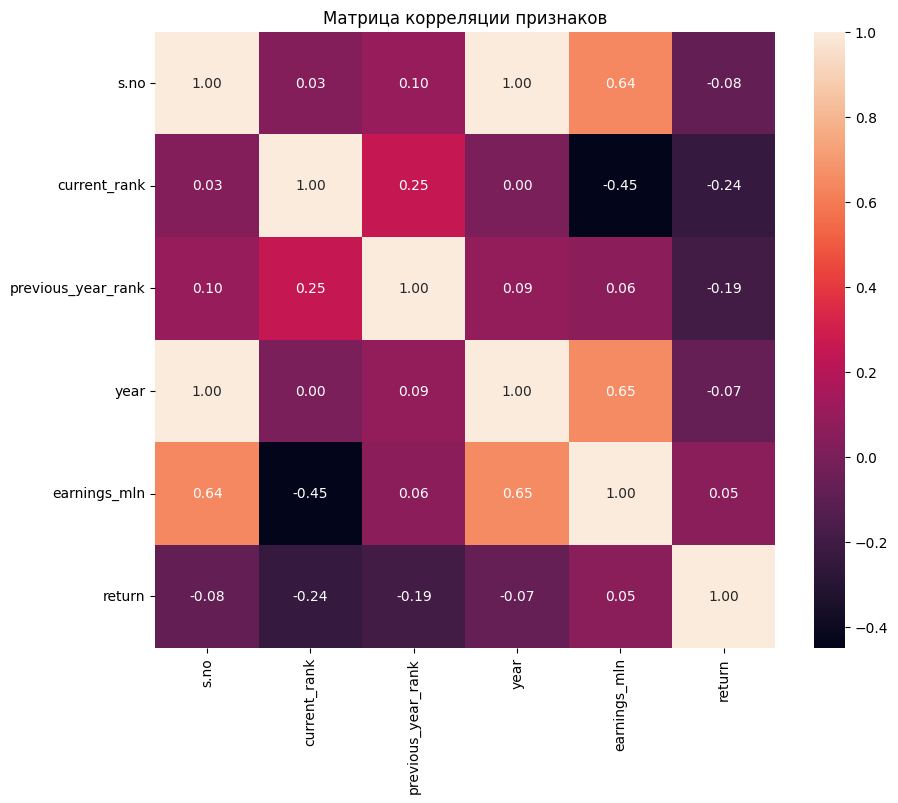

In [ ]:
plt.figure(figsize=(10, 8))
plt.title('Матрица корреляции признаков')
sns.heatmap(df.corr(), annot = True, fmt='.2f')
plt.show()

Год сильно коррелирует с порядковым номером. Оно и понятно, датасет остортирован по году.  Интересно то, что порядковы номер также довольно сильно коррелирует с прибылью. Скорее всего со временем спортсмены получали все больше.

Т.к. у нас есть 2 сильно коррелирующих признака, удалим один из них. Пусть это будет столбец s.no с порядковым номером

In [ ]:
df = df.drop(columns=['s.no'])

Простым линейным моделям для корректной работы в качестве входных данных мы должны передавать только численные признаки, поэтому есть необходимость преобразований категориальных признаков в численное представление.

Используем тип кодирования Label Encoder, который является наиболее часто используемым, преобразование представляет собой однозначное соответствие числа  уникальному значению категориального признака.

In [ ]:
labelencoder = LabelEncoder()
df['sport_number'] = labelencoder.fit_transform(df['sport'].values) # создаем колонку с номерами в соответствии с видом спорта
df['nationality_number'] = labelencoder.fit_transform(df['nationality'].values)# создаем колонку с номерами в соответствии с национальностью

Помним, что мы заменяли пропуски в столбце с предыдущим годовым рейтингом на нули, что может сильно повлиять на результат машинного обучения. Поэтому удалим эти строки.

In [ ]:
df=df.query('previous_year_rank>0')

Также удалим столбцы сос троковыми данными. Мы их уже заменили на численные

In [ ]:
df = df.drop(columns=['name', 'nationality', 'sport'])

Итак
- Датасет имеет 267 строк и 8 столбцов. 6 столбцов с признаками и 1 с целевой переменной
- 4 столбца - это числовые признаки, 2 столбца категориальные признаки

In [ ]:
df.head()

,current_rank,previous_year_rank,year,earnings_mln,return,sport_number,nationality_number
10,1,8,1991,60.5,1,6,20
11,2,1,1991,31.5,1,6,20
12,3,8,1991,16.0,1,5,20
13,4,30,1991,14.5,1,6,20
14,5,4,1991,13.0,1,2,3


### Матрица корреляции признаков ###

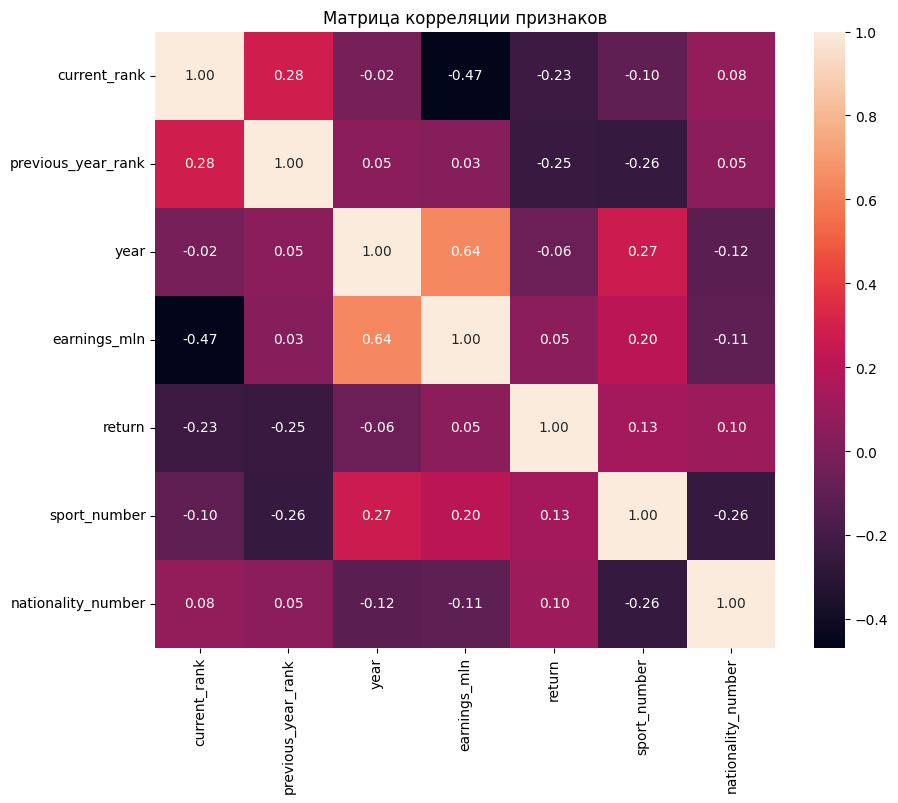

In [ ]:
plt.figure(figsize=(10, 8))
plt.title('Матрица корреляции признаков')
sns.heatmap(df.corr(), annot = True, fmt='.2f')
plt.show()

### Распределение признаков ###

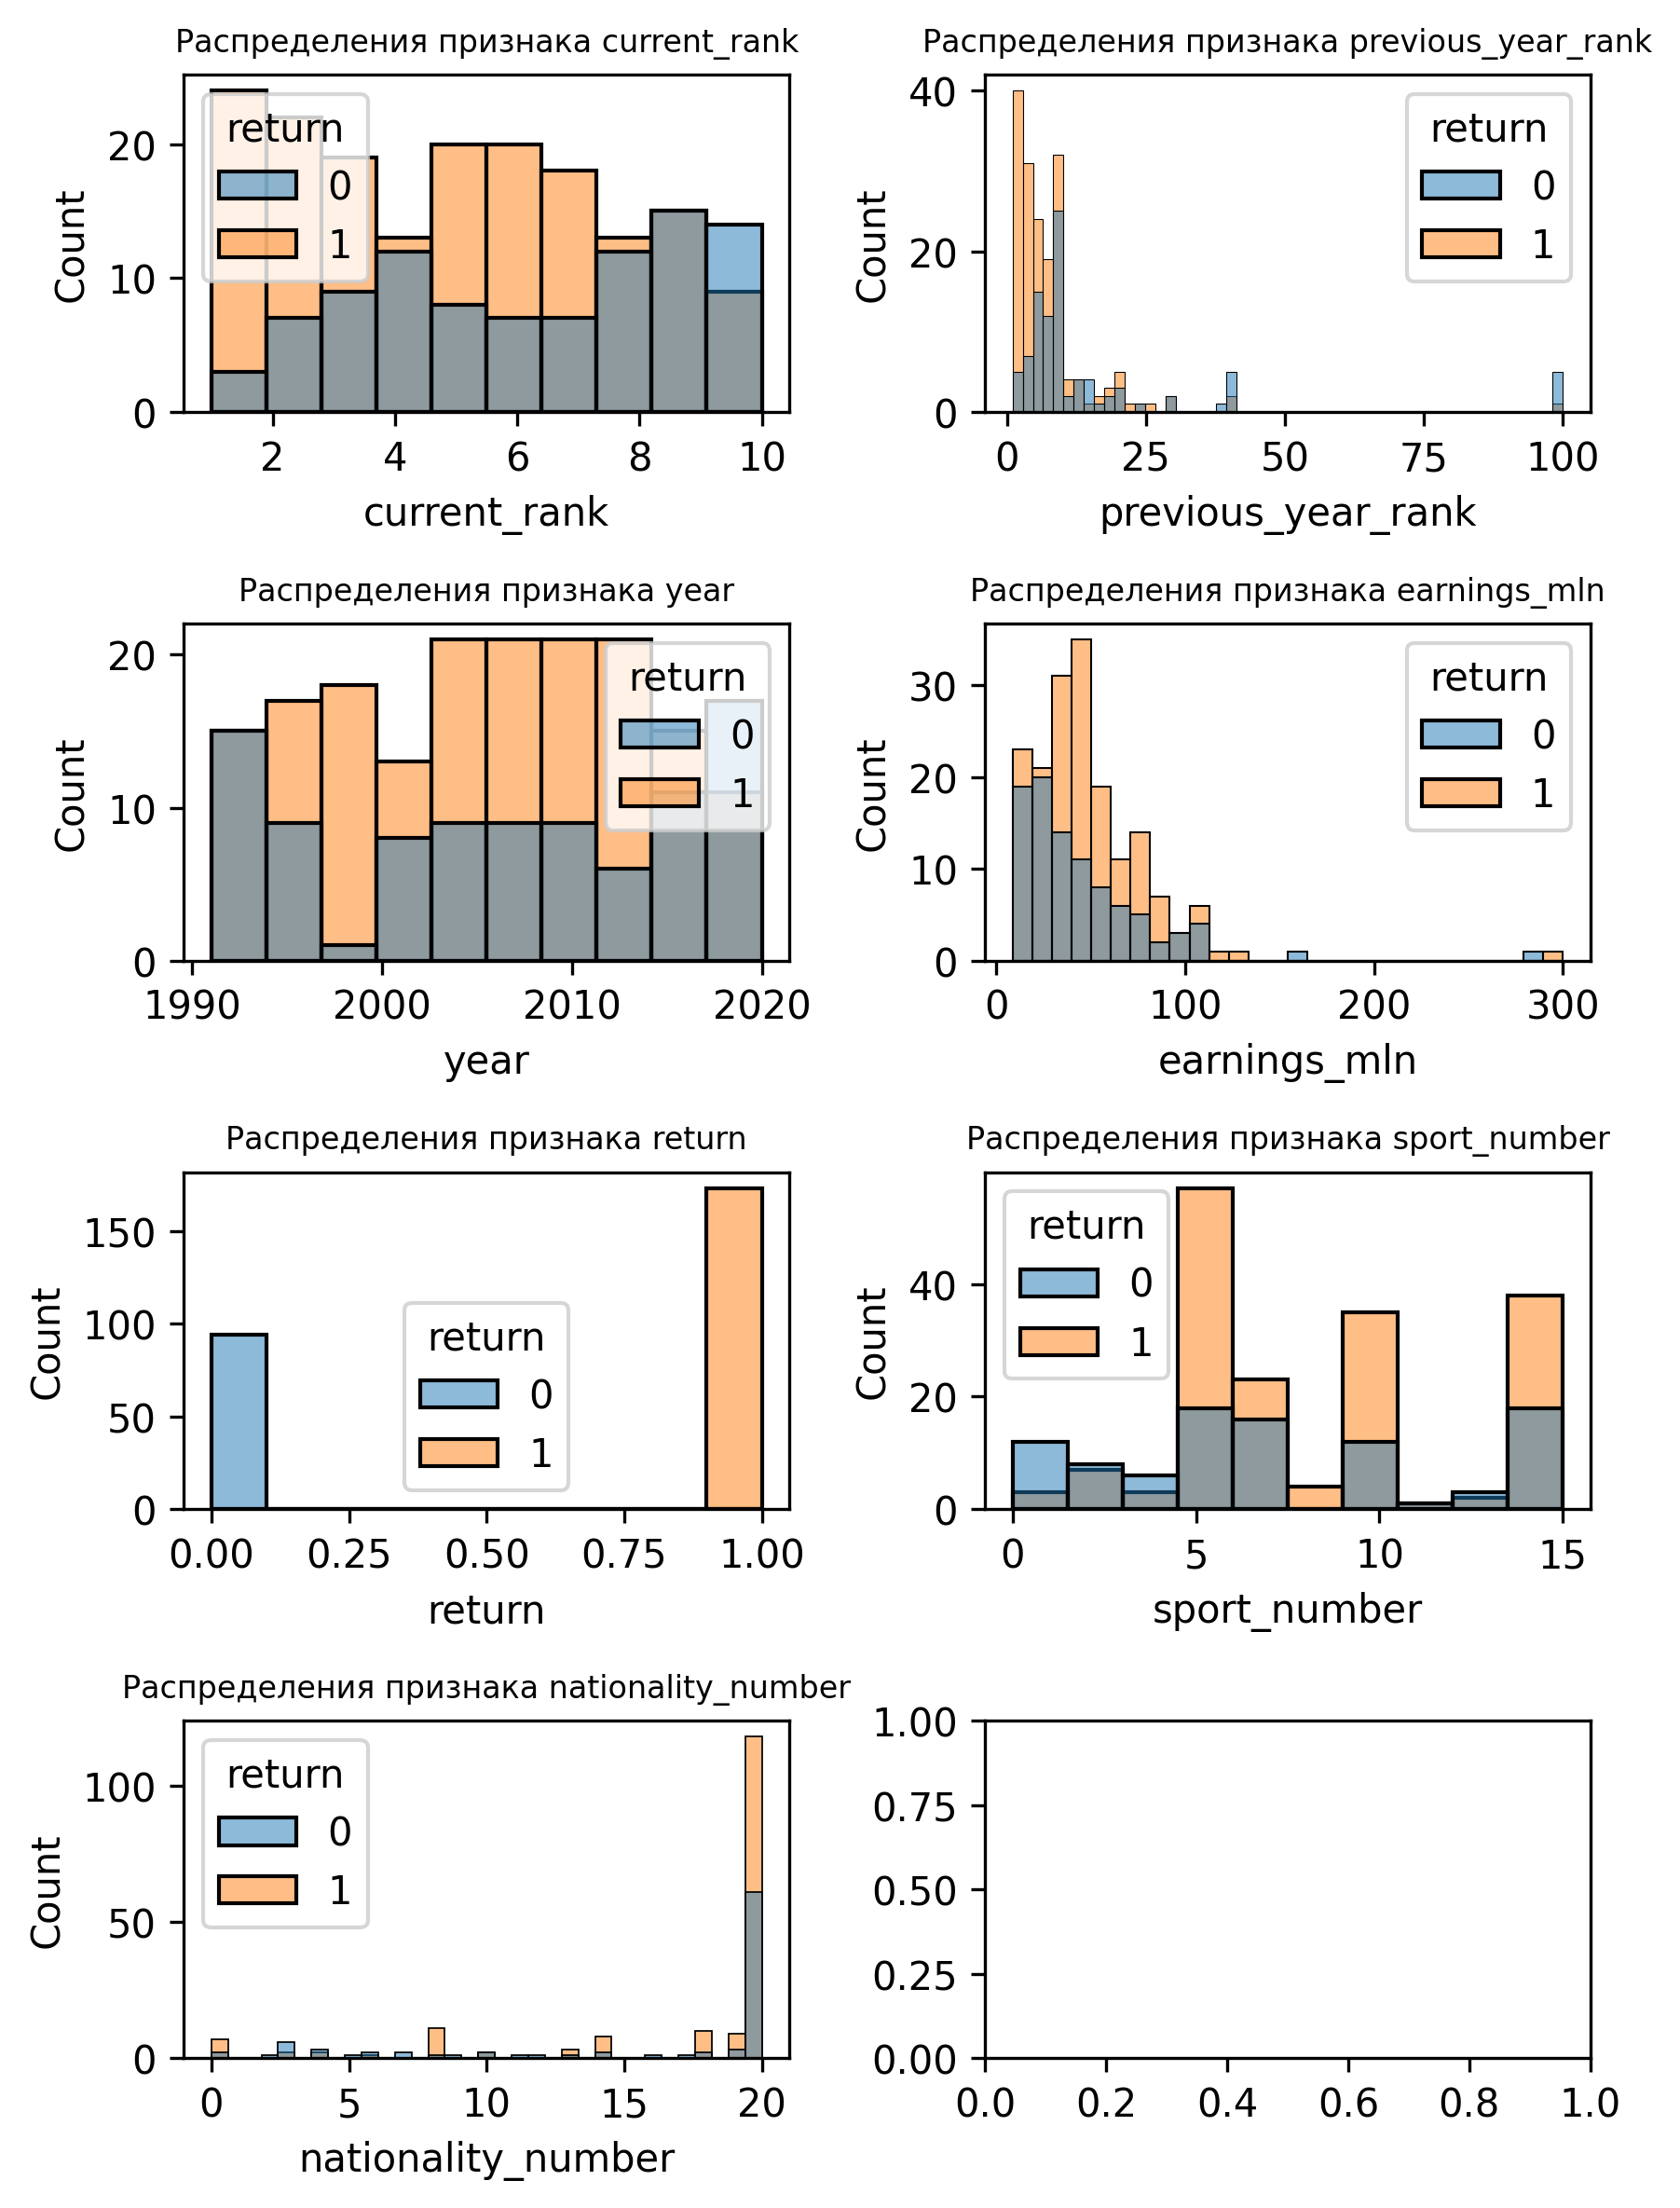

In [ ]:
fig, axs = plt.subplots(len(data.columns) // 2, 2)
fig.set_size_inches(6, 8)
fig.set_dpi(300)

new_axs = [item for sublist in axs for item in sublist]

for i, column in enumerate(df.columns):
    sns.histplot(data=df, x=column, hue='return',   ax=new_axs[i])
    new_axs[i].set_title('Распределения признака {}'.format(column), size=8)

plt.tight_layout()
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267 entries, 10 to 300
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   current_rank        267 non-null    int64  
 1   previous_year_rank  267 non-null    int64  
 2   year                267 non-null    int64  
 3   earnings_mln        267 non-null    float64
 4   return              267 non-null    int64  
 5   sport_number        267 non-null    int64  
 6   nationality_number  267 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 16.7 KB


### Логистическая регрессия и решающее дерево ###

Воспользуемся методом логистической регрессии - это бинарная классификация когда классов всего два: "0" или "1" (не вернется в список Forbes/ вернется в список Forbes).

Также используем метод решающего дерева и сравним их.

Разделим бд на 2 выборки. Пенрвая с признаками, вторая с целевой переменной.
Далее определим тренировочную и тестовую выборки в соотношении  80/20.

In [ ]:
x = df.drop('return', axis = 1)
y = df['return']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=40, test_size=0.2)

Алгоритм логистической регрессии вычисляет вероятность наступления события и в зависимости от нее вычисляет ответ: "0" или "1", сравнивая с определённым порогом — трешхолд. По умолчанию равен 0.5. Но такой порог применим только к сбалансированным выборкам.


In [ ]:
print('Баланс выборок:\n', df['return'].value_counts())

Баланс выборок:
 1    173
0     94
Name: return, dtype: int64


Наши выборки несбалансированы, поэтому попробуем поменять порог и скорректировать вероятность.


In [ ]:
threshold = 0.4

In [ ]:
lr = LogisticRegression(random_state=0).fit(x_train, y_train) #задаем алгоритм и обучаеим модель
pred = lr.predict(x_test) # считаем прогноз
prob = lr.predict_proba(x_test)[:,1]

acc = accuracy_score(pred, y_test) #считаем метрики
f1 = f1_score(pred, y_test)
rocauc = roc_auc_score(y_test, prob)

print('Логистическая регрессия')
print('accuracy: ', acc.round(2))
print('f1: ', f1.round(2))
print('rocauc: ', rocauc.round(2))

# расчитываем predict на основании вероятностей и соотношения классов
balanced_pred = [0 if i < threshold else 1 for i in prob]

acc_2 = accuracy_score(y_test, balanced_pred) #считаем метрики
f1_2 = f1_score( y_test, balanced_pred)
rocauc_2 = roc_auc_score(y_test, balanced_pred)
print('')
print('Логистическая регрессия с измененным порогом')
print('accuracy: ', acc_2.round(2))
print('f1: ', f1_2.round(2))
print('rocauc: ', rocauc_2.round(2))


# Сделаем тоже самое для решающего дерева
tree =DecisionTreeClassifier(random_state=0).fit(x_train, y_train)
tree_pred = tree.predict(x_test)
tree_prob= tree.predict_proba(x_test)[:, 1]

acc_tree = accuracy_score(y_test, tree_pred) #считаем метрики
f1_tree = f1_score( y_test, tree_pred)
rocauc_tree = roc_auc_score(y_test, tree_pred)
print('')
print('Решающее дерево')
print('accuracy: ', acc_tree.round(2))
print('f1: ', f1_tree.round(2))
print('rocauc: ', rocauc_tree.round(2))


Логистическая регрессия
accuracy:  0.67
f1:  0.78
rocauc:  0.65

Логистическая регрессия с измененным порогом
accuracy:  0.69
f1:  0.8
rocauc:  0.56

Решающее дерево
accuracy:  0.69
f1:  0.75
rocauc:  0.67


Text(0.5, 1.0, 'Пример ROC-кривой')

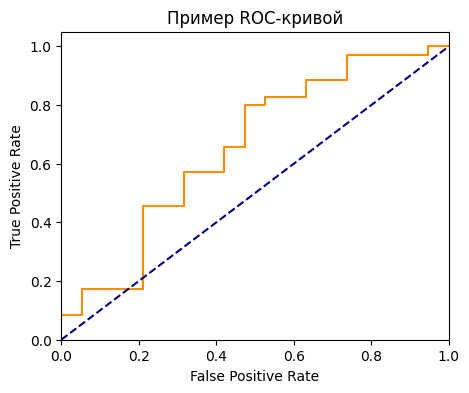

In [ ]:
fpr, tpr, treshold = roc_curve(y_test, prob)
roc_auc = auc(fpr, tpr)
# строим график
plt.subplots(figsize=(5, 4))
plt.plot(fpr, tpr, color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
fig.set_size_inches(5, 5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Пример ROC-кривой')

Text(0.5, 1.0, 'Пример ROC-кривой')

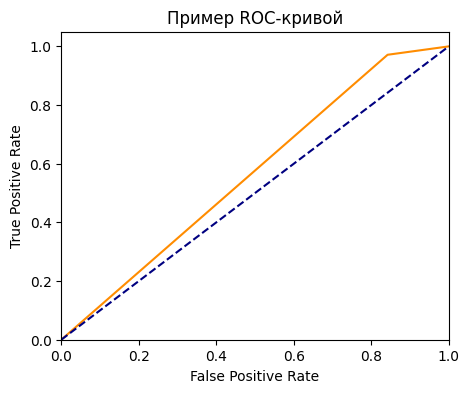

In [ ]:
fpr, tpr, treshold = roc_curve(y_test, balanced_pred)
roc_auc = auc(fpr, tpr)
# строим график
plt.subplots(figsize=(5, 4))
plt.plot(fpr, tpr, color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Пример ROC-кривой')

Text(0.5, 1.0, 'Пример ROC-кривой')

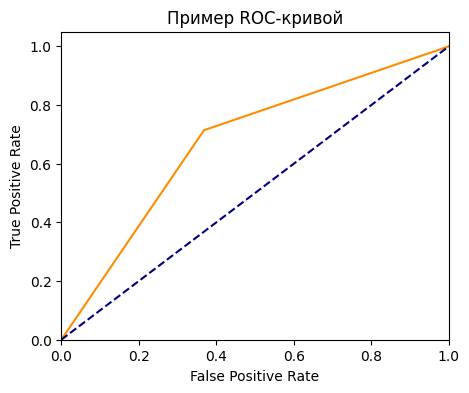

In [ ]:
fpr, tpr, treshold = roc_curve(y_test, tree_pred)
roc_auc = auc(fpr, tpr)
# строим график
plt.subplots(figsize=(5, 4))
plt.plot(fpr, tpr, color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Пример ROC-кривой')

Чем выше «выгибается» кривая ошибок к верхнему левому углу, то есть чем ближе она к 1, тем лучше. А чем ближе она к линии TPR=FPR, тем хуже.

На наших примерах видно, что кривая ошибок с порогом 0,5 выгибается выше.
А с методом решающего дерева еще выше, что подтверждает расчеты.

### Выбор метода обучения ###

С изменением порога 0,5 -> 0,4 выросла доля правильных ответов (accuracy) на 2%, и F-мера на 0.02%
                    - F1 = 2 * (Точность * Полнота) / (Точность + Полнота)
                    - Точность = истинный положительный результат / (истинный положительный результат + ложный положительный результат)
                    TPR/(TPR+FPR)
                    - Полнота = истинно положительный / (истинно положительный + ложноотрицательный)
                    TPR/(TPR+FNR)
Но RocAuc усеньшается на 9 %

В целом, ROC рассчитан для множества различных уровней пороговых значений и, следовательно, имеет множество значений F. Оценка F1 применима для любой конкретной точки на кривой ROC.

Можно рассматривать это как показатель точности и полноты при определенном пороговом значении, тогда как AUC - это площадь под кривой ROC. Чтобы показатель F1 был высоким, и точность, и отзыв должны быть высокими.

Следовательно, когда есть дисбаланс данных между положительными и отрицательными выборками, мы будем использовать оценку F1, потому что ROC в среднем превышает все возможные пороговые значения.

** Следовательно оставим порог равный 0,4 и метод логистической регрессии, как наиболее эффективный. **

## Выводы ##

Мы проанализировали данные о спортсменах из списка Forbes. На основании имеющихся данных было построено две модели прогнозирования возврата спортсменов в список повторно.
- логистическая регрессия;
- решающее дерево

Основываясь на показаниях ключевых метрик оценки моделей accurancy, f1, rocauc можно сказать, что обе модели хорошо показывает себя в прогнозировании. На основании того, что выборки не сбалансированы, будем считать более эффективной модель логической регрессии с порогом 0,4.
